<a href="https://colab.research.google.com/github/davidvlaminck/AWVGeneric/blob/master/UseCases/Bestekkoppeling/voorbeeld_bestekkoppelingen_overdragen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Voorbeeld bestekoppelingen overdragen

Achterliggend wordt gebruik gemaakt van de [EM-Infra API](https://apps.mow.vlaanderen.be/eminfra/core/swagger-ui/).

Lanceer via de play-knop 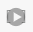
aan de linkerzijde achtereenvolgens ieder blokje code.

Activeer de blokjes één voor één en voer de instructies uit in volgorde.

## 1. Voorbereiding
Voer onderstaande code uit. Dit haalt code op en installeert packages.

In [ ]:
import os, shutil
import sys
if os.path.exists('AWVGeneric'):
  shutil.rmtree('AWVGeneric')
!git clone https://github.com/davidvlaminck/AWVGeneric.git
sys.path.insert(0, '/content/AWVGeneric')  # adds the Python files from the GitHub repo to the sys-path.

## 2. Parameters instellen
Haal een cookie op volgens [deze instructies](https://sites.google.com/mow.vlaanderen.be/em-infra/afspraken-conventies/awv-cookie-ophalen).
Vul deze hieronder in, en pas eventueel de filters aan.
Druk daarna op de play-knop

In [8]:
    from API.Enums import AuthType, Environment
    cookie = 'db3e9f142f724dc8b720108d108222af'
    environment = Environment.PRD
    print('parameters ingevuld')

parameters ingevuld


## 3. Bestekken definiëren
Met deze code kan je bestekken ophalen uit de API en verifiëren dat je de juiste bestekreferentie hebt gevonden.

In [ ]:
from API.EMInfraClient import EMInfraClient
eminfra_client = EMInfraClient(env=environment, auth_type=AuthType.COOKIE, cookie=cookie)

oud_eDelta_dossiernummer = 'VWT/CEW/2020/009-2'
nieuw_eDelta_dossiernummer = 'AWV/VW/2024/1_P2'

bestekref1 = eminfra_client.get_bestekref_by_eDelta_dossiernummer(eDelta_dossiernummer=oud_eDelta_dossiernummer)
print(bestekref1)
bestekref2 = eminfra_client.get_bestekref_by_eDelta_dossiernummer(eDelta_dossiernummer=nieuw_eDelta_dossiernummer)
print(bestekref2)

## 4. Bestekkoppelingen aanpassen
Met deze code kan je assets opzoeken en vervolgens de koppelingen wijzigen.
Met de replace functie kan je aangeven welk bestek moet worden vervangen door een ander bestek en vanaf welk tijdstip dit moet doorgaan.

In [ ]:
from datetime import datetime
from API.EMInfraDomain import QueryDTO, ExpansionsDTO, PagingModeEnum, SelectionDTO, ExpressionDTO, TermDTO, \
    OperatorEnum, LogicalOpEnum

query_dto = QueryDTO(size=100, from_=0, pagingMode=PagingModeEnum.OFFSET,
                     selection=SelectionDTO(
                         expressions=[ExpressionDTO(
                             terms=[
                                 TermDTO(property='actief', operator=OperatorEnum.EQ,
                                         value=True),
                                 TermDTO(property='actiefBestek', operator=OperatorEnum.EQ,
                                         value=bestekref1.uuid, logicalOp=LogicalOpEnum.AND)])]))

for counter, asset in enumerate(eminfra_client.search_assets(query_dto)):
    print(f'Asset {counter + 1}: {asset.uuid}')
    if not asset.type.korteUri.startswith('lgc:'):
        print(f'Asset {counter + 1} is not a lgc type, skipped')
        continue

    eminfra_client.replace_bestekkoppeling(asset_uuid=asset.uuid,
                                           eDelta_dossiernummer_old=oud_eDelta_dossiernummer,
                                           eDelta_dossiernummer_new=nieuw_eDelta_dossiernummer,
                                           start_datetime=datetime(2025, 4, 2))

    # break # te gebruiken wanneer je één wijziging wil testen (opletten: break moet in de for-loop zitten dus 4 spaties of 1 tab)

Asset 1: 00026034-00a5-4420-9583-8b4295ccf949
